<a href="https://colab.research.google.com/github/kartikshastrakar/kartik/blob/main/Exploratory_Data_Analysis_on_Automobile_dataset_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on Automobile data set.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dataset Link - https://www.kaggle.com/toramky/automobile-dataset

1. 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2. Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3. Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

This data set consists of three types of entities: 
(a) the specification of an auto in terms of various characteristics
(b) its assigned insurance risk rating
(c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

In [1]:
# Importing all the necessary packages 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# Loading the dataset 
data=pd.read_csv('/content/Automobile_data.csv')

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
# Lets check the dimension of the data set 
data.shape

(205, 26)

In [6]:
# Printing the first 5 records of the data set 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [8]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


From the above snapshot of the data, we can see that some columns have missing values '?'.


# Missing Value Detection and Treatment

In [9]:
# Lets start by checking the count of records in each column of the data set. 
# If the count of records is lesser than the total number of records i.e. 768, we can conclude that there 
# are blank records. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

There are no blank records. The missing records are represented by a '?'.

In [10]:
# Since some of the predictor columns are continuous in nature, there might be a chance that 0's 
#in these columns indicate missing data. 

# Lets check the above claim.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


None of the coninuous columns seem to have missing values represented by 0's.
We can also see that there are a total of 11 continuous variables, but the describe table has only 10 continuous variables. 
This is because column "normalized losses" has missing values.

In [11]:
# Treating missing values in the "normalized losses" column
from numpy import nan
data['normalized-losses']=data['normalized-losses'].replace('?',np.nan)


In [12]:
# Lets check if the '?' have been replaced with nan 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [14]:
print(data.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


Normalized-losses has 41 missing data points.
We will replace these missing values with the median of 'Normalized - losses' because median is least affected by outliers. 

In [15]:
# Imputing missing values with their respective columns median
data.fillna(data.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [16]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


symboling               1.0
normalized-losses     115.0
wheel-base             97.0
length                173.2
width                  65.5
height                 54.1
curb-weight          2414.0
engine-size           120.0
compression-ratio       9.0
city-mpg               24.0
highway-mpg            30.0
dtype: float64

In [17]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [18]:
print(data.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Also, notice that the data type of NormalizedLosses is object, we have to change its data type to numeric (float)

In [20]:
data['normalized-losses']=pd.to_numeric(data['normalized-losses'], downcast="float")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float32
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [23]:
 data['normalized-losses']=data['normalized-losses'].astype('float64')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Now that we have treated the missing values lets move to outlier detection and treatment.

# Outlier Detection and treatment

Outlier Detection 

Boxplots are a great way of detecting outliers. 
Once the outliers have been detected, they can be imputed with the 5th and 95th percentiles.

In [30]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

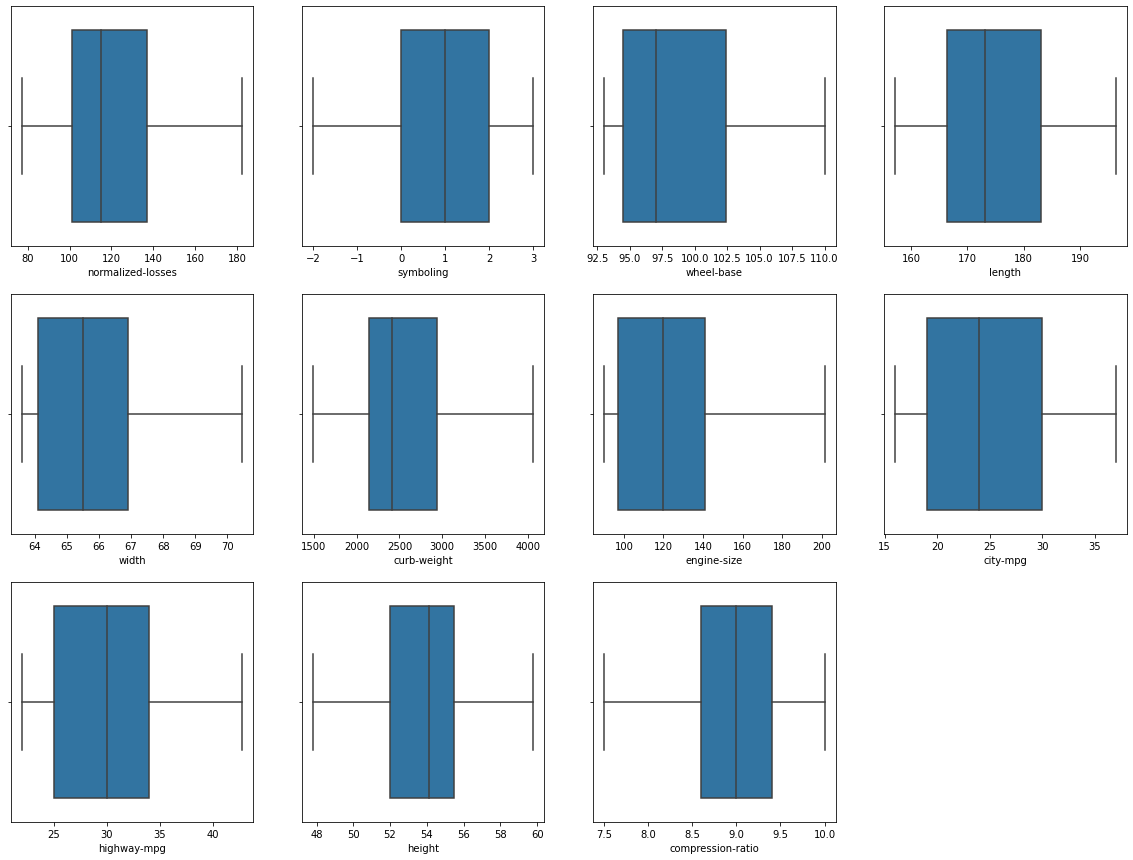

In [31]:
# Outlier detection using boxplots 
plt.figure(figsize= (20,15))

plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(data['symboling'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])

plt.subplot(3,4,10)
sns.boxplot(data['height'])

plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])


From the above boxplots we can infer that out 11 continuous variables 8 of them have outliers. These outliers will be imputed with the 5th and 95th percentiles.

In [32]:
data['normalized-losses']=data['normalized-losses'].clip(lower=data['normalized-losses'].quantile(0.05), upper=data['normalized-losses'].quantile(0.95))

In [33]:

data['wheel-base']=data['wheel-base'].clip(lower=data['wheel-base'].quantile(0.05), upper=data['wheel-base'].quantile(0.95))
data['length']=data['length'].clip(lower=data['length'].quantile(0.05), upper=data['length'].quantile(0.95))
data['width']=data['width'].clip(lower=data['width'].quantile(0.05), upper=data['width'].quantile(0.95))
data['engine-size']=data['engine-size'].clip(lower=data['engine-size'].quantile(0.05), upper=data['engine-size'].quantile(0.95))
data['city-mpg']=data['city-mpg'].clip(lower=data['city-mpg'].quantile(0.05), upper=data['city-mpg'].quantile(0.95))
data['highway-mpg']=data['highway-mpg'].clip(lower=data['highway-mpg'].quantile(0.05), upper=data['highway-mpg'].quantile(0.95))
data['compression-ratio']=data['compression-ratio'].clip(lower=data['compression-ratio'].quantile(0.05), upper=data['compression-ratio'].quantile(0.89))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

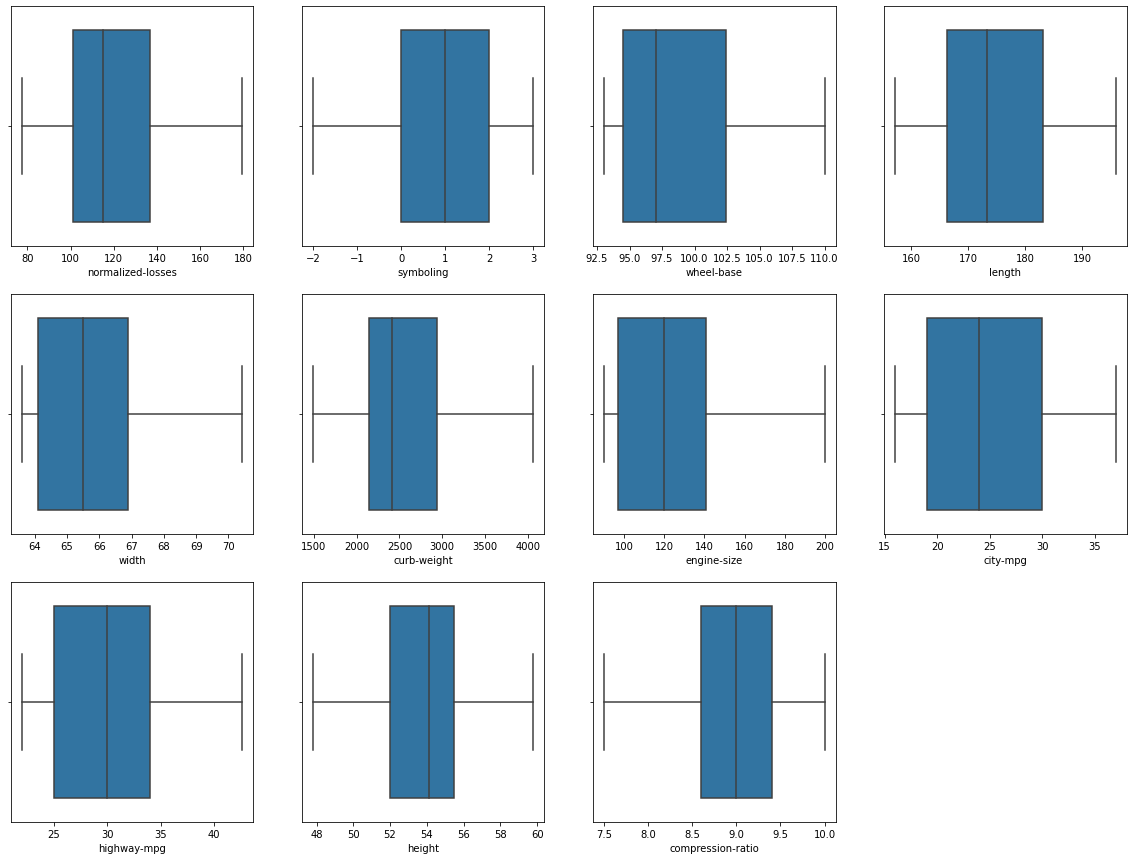

In [34]:
plt.figure(figsize= (20,15))
plt.subplot(3,4,1)
sns.boxplot(data['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(data['symboling'])

plt.subplot(3,4,3)
sns.boxplot(data['wheel-base'])

plt.subplot(3,4,4)
sns.boxplot(data['length'])

plt.subplot(3,4,5)
sns.boxplot(data['width'])

plt.subplot(3,4,6)
sns.boxplot(data['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(data['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(data['city-mpg'])

plt.subplot(3,4,9)
sns.boxplot(data['highway-mpg'])

plt.subplot(3,4,10)
sns.boxplot(data['height'])

plt.subplot(3,4,11)
sns.boxplot(data['compression-ratio'])

# Data Vizualisation 

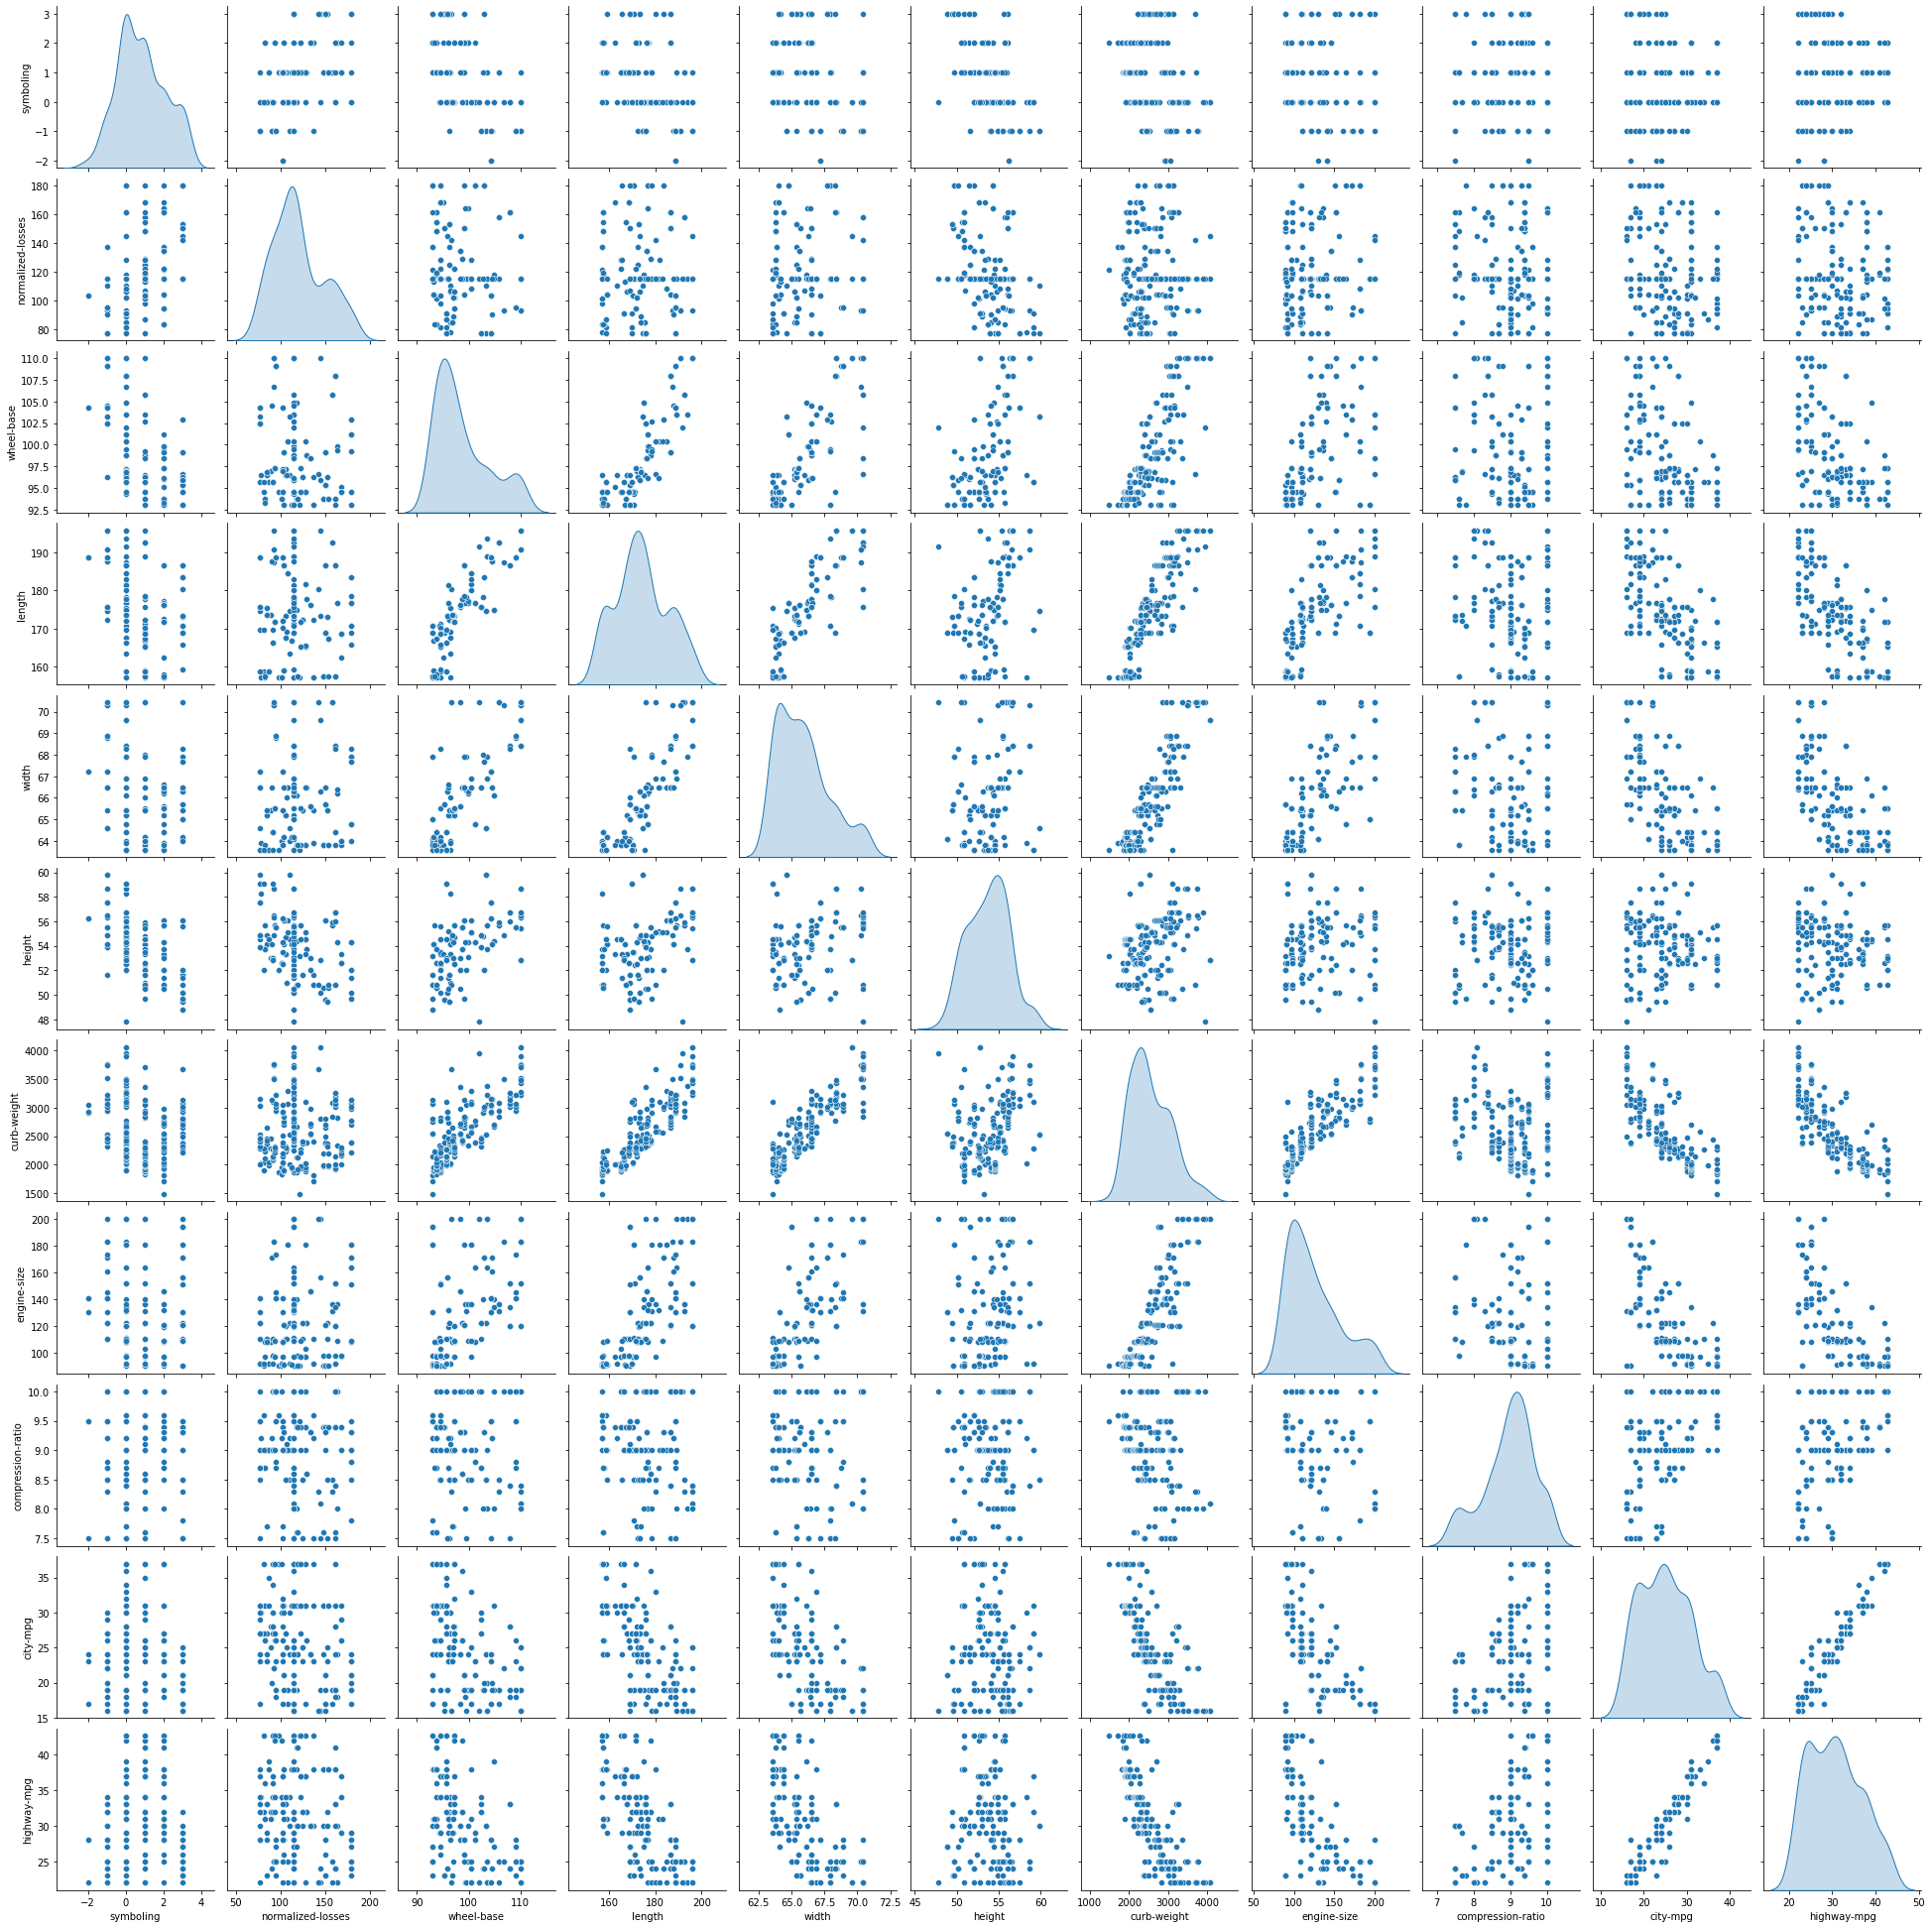

In [35]:
sns.pairplot(data,diag_kind='kde')

Some of the kernal density estimate plots show more than 1 peak, indicatig the preasence of clusters in the data set.


In [36]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

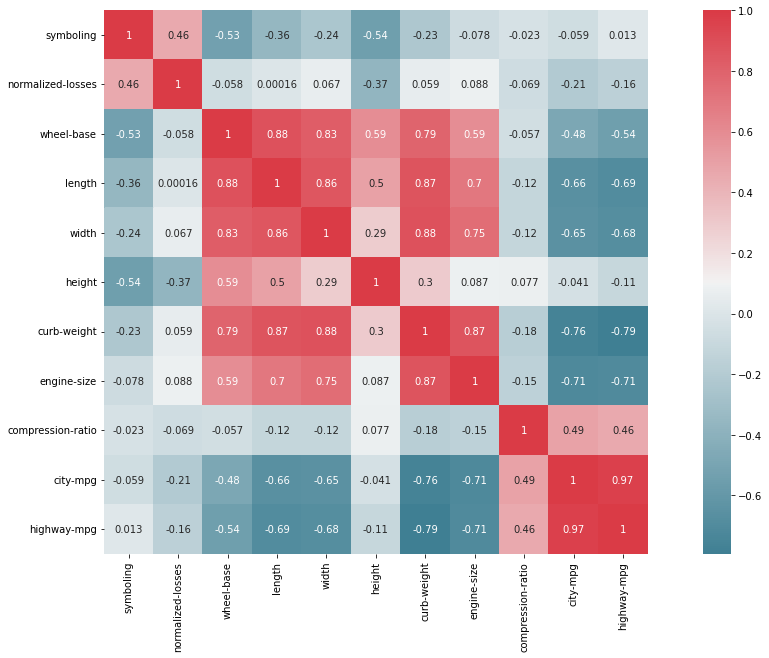

In [37]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

The above corrplot shows preasence of multi colinearity in the data set.

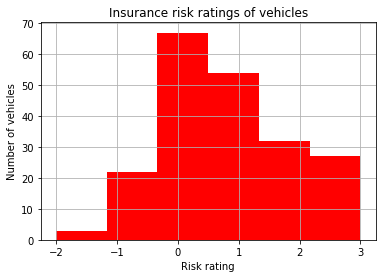

In [38]:
data.symboling.hist(bins=6,color='red');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

From the above histogram we can infer that a major part of the distribution lies between the range of 0.5 - 1.5. 
We can also infer that a large number of cars in this data set are safe. 

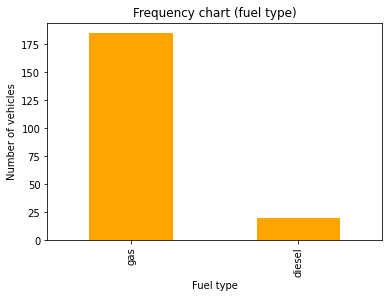

In [39]:
data['fuel-type'].value_counts().plot(kind='bar',color='orange')
plt.title("Frequency chart (fuel type)")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

From the above barchart we can infer that majority of the cars recorded in this datset run on gas 

# Data Preprocessing 

This dataset has 15 categorical variables and most of them have more than 2 categories. 
We can not run a regression model on text data. So, in order to deal with this challenge lets learn about label encoding. 
Label encoding is the preocess of converting categorical (text) data into numerical data. 

Lets see how this is done.

In this example we will be working with the variable 'body-style' which has 5 categorie, namely -
1. convertible 
2. Hatchback 
3. Sedan
4. Wagon
5. hardtop

In [40]:
# data before lable encoding 
data['body-style'].head(20)

0     convertible
1     convertible
2       hatchback
3           sedan
4           sedan
5           sedan
6           sedan
7           wagon
8           sedan
9       hatchback
10          sedan
11          sedan
12          sedan
13          sedan
14          sedan
15          sedan
16          sedan
17          sedan
18      hatchback
19      hatchback
Name: body-style, dtype: object

In [41]:
# Label encoding 
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['body-style'] = labelencoder.fit_transform(data['body-style'])

In [42]:
# data after label encoding 
data['body-style'].head(20)

0     0
1     0
2     2
3     3
4     3
5     3
6     3
7     4
8     3
9     2
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    2
19    2
Name: body-style, dtype: int64

After running the label encoding code, we can see that the variable body-style has numerical values ranging from 0-4.

The problem with lable encoding is that it introduces an order between the categories, i.e. 0>1>2>3>4. 
This might confuse the model into thinkin that convertible is greater than hatchback. 

So to deal with this problem, lets understand the concepts of one hot encoder.

In one hot encoding, categorical columns that have been label encoded are split into multiple colums and the values are replaced with 0's and 1's. 1's mark the preasence of a value and 0 its absence. 

Lets look at an example -

In [43]:
# data before one hot encoding 
data['body-style'].head(10)

0    0
1    0
2    2
3    3
4    3
5    3
6    3
7    4
8    3
9    2
Name: body-style, dtype: int64

In [44]:
# One hot encoding 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['body-style']]).toarray())

In [45]:
# data after one hot encoding 
enc_df

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
200,0.0,0.0,0.0,1.0,0.0
201,0.0,0.0,0.0,1.0,0.0
202,0.0,0.0,0.0,1.0,0.0
203,0.0,0.0,0.0,1.0,0.0
